In [1]:
include("/Users/gr_1/Documents/IsoFlex/IsoFlex.jl")
using Plots

In [2]:
W = zeros(1000,1000)
#W[:,498:502] .= 1e3
W[:,500-25:500+25] .= 2e6/50
I = IsoFlex.flexural(W, Nx = 0, Ny = 0, Nxy = 0, dx=1000, dy=5000, Te = 30e3, ncores=6);
#heatmap(I)#-1e15)  )#- IsoFlex.flexural(W))

In [3]:
w_line1 = I[500,:];

## Analytic solution comparisons
#### Basic line load - no in-plane stress


In [4]:
pm = 3300
pc = 2750
Te = 30000
v = .25
Nx = -100e12
E = 100e9
g = 9.81
D0 = E * Te^3 / (12 * (1 - v ^ 2))
dRho = pm-pc
V0 = 2e6 * 2750* 9.81 * 1000 #* 3300/(3300-2750) #(3300/(3300-2750)) #load .1e6 meter * density 2750 *  g * 1000m (x-)

beta =  ((3300 * g / (4*D0)) ^ .5 + (Nx / (4*D0))) ^ -.5
gamma = ((3300 * g / (4*D0)) ^ .5 - (Nx / (4*D0))) ^ -.5
alpha = (4 * D0 / (3300 * g)) ^ .25

we = V0 / (2 * alpha^2 * 3300 * g) 
wl = V0 * alpha^3 / (7 * D0 )

x = float(collect(-1e6/2:1000:1e6/2-1000))
w0 = real(wl * exp.( - abs.(x) ./ alpha ) .* ( cos.( x ./ alpha ) .+ sin.(abs.(x) ./ alpha) ));
w = real(we * exp.( .- abs.(x) ./ beta ) .* ( beta .* cos.( x ./ gamma ) .+ gamma .* sin.(abs.(x) ./ gamma) ));

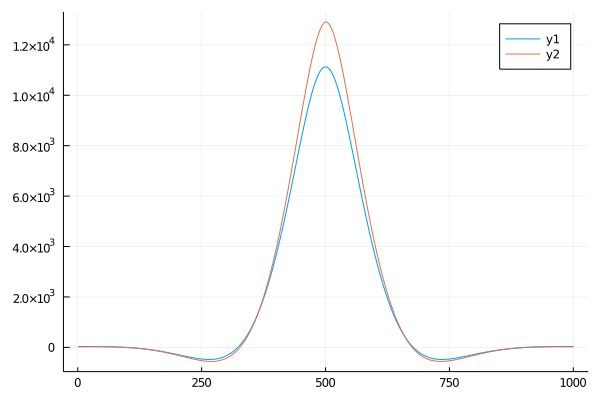

In [5]:
#plot(w0)
plot(w_line1)
plot!(w0)

## In - plane 

In [6]:
 W = zeros(1000,1000)
 W[:,500] .= 2e6
# I = IsoFlex.flexural(W, Nx = 000 * 2750 * .1e6 * 9.81*30, Ny = 0, Nxy = 1000*2750*.1e6 * 9.81 * 100, dx=1000, dy=1000, Te = 100e3, ncores=6);
# w_line = I[2500,:];
I = IsoFlex.flexural(W, Nx = -0e12, Ny = 0, Nxy = 0, dx=1000, dy=1000, Te = 25e3, ncores=6);
w_line2 = I[500,:];
I = IsoFlex.flexural(W, Nx = -100e12, Ny = 0, Nxy = 0, dx=1000, dy=1000, Te = 25e3, ncores=6);
w_line1 = I[500,:];




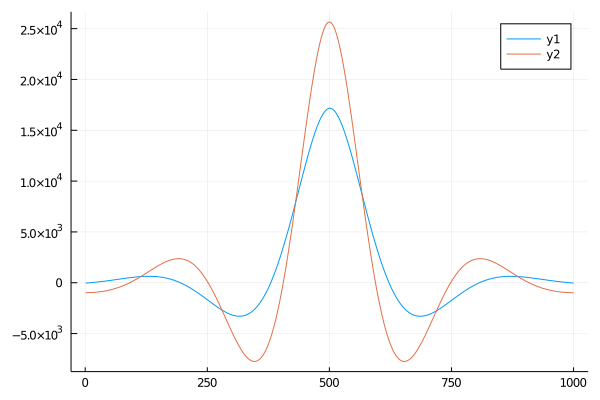

In [7]:
plot(w)
plot!(w_line1)
#plot(w_line0, xlabel = "km", ylabel="m",label="N=10^15")

#plot(w_line1 - w_line2, xlabel = "km", ylabel="m",label="N=10^12")
#plot!(w_line2, xlabel = "km", ylabel="m",label="N=0")
#plot!(, xlabel = "km", ylabel="m",label="N=10^12")
#title

## Variable Te

In [ ]:
include("/Users/gr_1/Documents/IsoFlex/IsoFlex.jl")
ero = zeros(1000,1000)
ero[400:600, 400:600] .= 100
Te = zeros(1000,1000) .+ 0e3
for i =1:1000
    Te[i, :] .= 1e3*i/10
end


t = 0
dt = 1e6
dy = 1000.0
dx = 1000.0
E = 100e9
g = 9.81
v = .25
pm = 3300.0
pc = 2400.0
buffer = 0
ncores = 1
pw = 0
firstiter=true
Te0 = 20e3
m,n = size(ero);


w = IsoFlex.flexural(ero;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx, Te0=100e3)
m,n = size(ero)


3.7312513318409515
2.4520549175546336


1.7591952294612305
1.3289837133813691
1.0373773130197037
0.8283074502164922
0.6725517580829177
0.5533230894231735
0.46017153777654585
0.38620576672559537
0.32671343881993664
0.27830845608848875
0.23854570385719143
0.20560220988785716
0.1780972650277235
0.15497114487822472
0.13540150226064895
0.118757674125618
0.10451427875791097
0.0922787695567635
0.08171391921163718
0.07255524840274319
0.06458783866390405
0.05763336652550777
0.051541608176734144
0.04618965541253317
0.041474504100293075
0.03730943553660637
0.03362112214054491
0.030932231769165153
0.028713550431382906
0.02668785660614592
0.02483547409357234
0.023140180875386385
0.021588269689262862
0.020164577921536697
0.01885714418601392
0.017655183381918516
0.016548983619423474
0.015530060049842032
0.014590471041329156
0.013722732124707537
0.012920439924363869
0.012177824081917255
0.011489652291990282
0.010851217519683765
0.010258240807774488
0.009706867942618658
0.009193592152610286
0.009014966433379734
0.008864393690433459
0.0087082

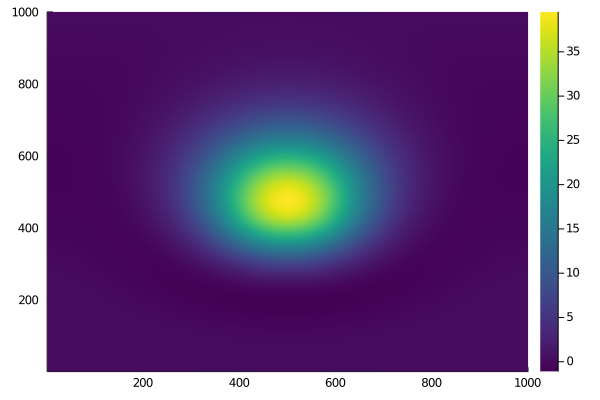

In [43]:
heatmap(w,c = :viridis)

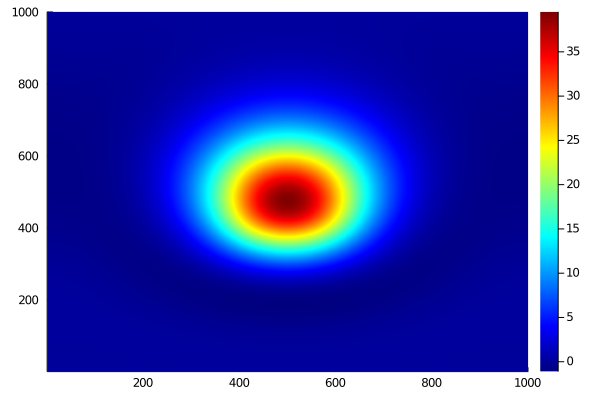

In [44]:
heatmap(w, c = :jet)